In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Optional but useful
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load clean datasets
df_clean = pd.read_csv('../data/processed/anime_clean.csv', index_col=0)
df_movies = pd.read_csv('../data/processed/anime_movies.csv', index_col=0)
df_series = pd.read_csv('../data/processed/anime_series.csv', index_col=0)

# Ensure date columns are datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_series['release_date'] = pd.to_datetime(df_series['release_date'])

print(f"Clean dataset: {df_clean.shape}")
print(f"Movies: {df_movies.shape}")
print(f"Series: {df_series.shape}")

Clean dataset: (2460, 9)
Movies: (448, 9)
Series: (2009, 9)


In [6]:
df_clean.head()

,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source,year
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",WIT STUDIO,25,2013-04-01,Tv,84.0,AniList,2013.0
1,Demon Slayer: Kimetsu no Yaiba,"Action, Adventure, Drama, Fantasy, Supernatural",ufotable,26,2019-04-01,Tv,82.0,AniList,2019.0
2,Death Note,"Mystery, Psychological, Supernatural, Thriller",MADHOUSE,37,2006-10-01,Tv,84.0,AniList,2006.0
3,JUJUTSU KAISEN,"Action, Drama, Supernatural",Toho,24,2020-10-01,Tv,85.0,AniList,2020.0
4,My Hero Academia,"Action, Adventure, Comedy",bones,13,2016-04-01,Tv,76.0,AniList,2016.0


In [7]:
df_clean.groupby('content_type')['viewer_reviews'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
content_type,,,,,,,,
Movie,310.0,75.30,6.19,52.0,71.00,76.0,80.00,91.0
Music,2.0,83.00,4.24,80.0,81.50,83.0,84.50,86.0
Ona,127.0,72.46,7.02,52.0,68.00,73.0,77.00,86.0
Ova,180.0,72.12,6.62,33.0,69.00,72.5,76.00,88.0
Special,62.0,73.21,6.93,49.0,70.00,73.0,77.75,90.0
Tv,1723.0,71.47,7.94,21.0,66.00,72.0,77.00,91.0
Tv Short,56.0,63.82,10.26,27.0,60.75,65.5,71.00,83.0


In [ ]:
mean_score = df_clean['viewer_reviews'].mean().round(2)
median_score = df_clean['viewer_reviews'].median().round(2)
std_score = df_clean['viewer_reviews'].std().round(2)

good_reviews = (df_clean['viewer_reviews'] > 50).sum()
total_reviews = len(df_clean)
percentage_good = ((good_reviews / total_reviews) * 100).round(1)

print(f"📊 ANIME REVIEWS SUMMARY:")
print(f"   Mean score: {mean_score}")
print(f"   Median score: {median_score}")
print(f"   Standard deviation: {std_score}")
print(f"   Percentage of good reviews (>50): {percentage_good}%")

if percentage_good > 50:
    print(f"The majority ({percentage_good}%) of reviews are good!")
else:
    print(f"The majority ({100-percentage_good}%) of reviews are poor!")

ANIME REVIEWS SUMMARY:
   Mean score: 71.93
   Median score: 72.0
   Standard deviation: 7.84
   Percentage of good reviews (>50): 98.9%
The majority (98.9%) of reviews are good!


1. UNIVARIATE ANALYSIS
🎯 RATING ANALYSIS:
   Average rating: 71.93
   Most common range: 67-77
   Highest rated anime: 91
   Lowest rated anime: 21

📺 EPISODES ANALYSIS:
   Average episodes: 15.5
   Most common: 12 episodes (median)
   Longest series: 1000 episodes
   Short anime (≤12 ep): 1681 (68.3%)
   Standard anime (13-24 ep): 501 (20.4%)
   Long anime (>24 ep): 278 (11.3%)

📅 PRODUCTION TIMELINE:
   Time span: 1970 - 2025
   Peak production year: 2023 (166 anime)
   Average production year: 2015
   Recent anime (2010+): 2018 (82.0%)
   Classic anime (<2010): 442 (18.0%)



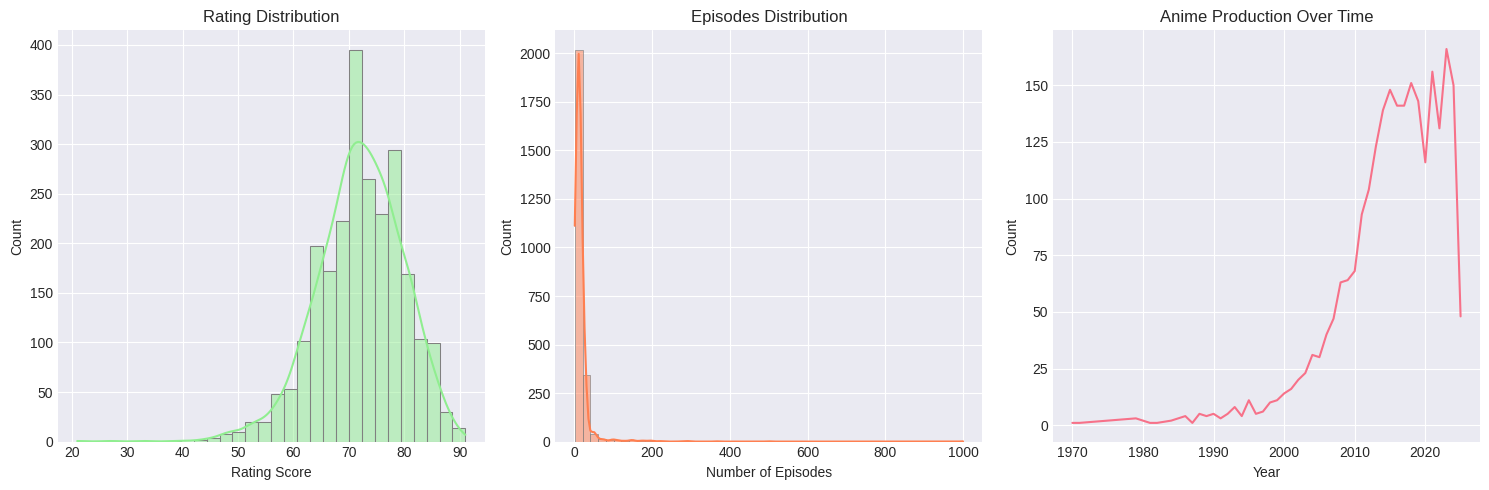

In [39]:
print("="*50)
print("1. UNIVARIATE ANALYSIS")
print("="*50)

# RATINGS ANALYSIS
print("🎯 RATING ANALYSIS:")
rating_stats = df_clean['viewer_reviews'].describe()
print(f"   Average rating: {rating_stats['mean']:.2f}")
print(f"   Most common range: {rating_stats['25%']:.0f}-{rating_stats['75%']:.0f}")
print(f"   Highest rated anime: {rating_stats['max']:.0f}")
print(f"   Lowest rated anime: {rating_stats['min']:.0f}")
print()

# EPISODES ANALYSIS
print("📺 EPISODES ANALYSIS:")
episodes_stats = df_clean['number_of_episodes'].describe()
print(f"   Average episodes: {episodes_stats['mean']:.1f}")
print(f"   Most common: {episodes_stats['50%']:.0f} episodes (median)")
print(f"   Longest series: {episodes_stats['max']:.0f} episodes")

# Categorize by length
short_anime = (df_clean['number_of_episodes'] <= 12).sum()
standard_anime = ((df_clean['number_of_episodes'] > 12) & (df_clean['number_of_episodes'] <= 24)).sum()
long_anime = (df_clean['number_of_episodes'] > 24).sum()

print(f"   Short anime (≤12 ep): {short_anime} ({(short_anime/len(df_clean)*100):.1f}%)")
print(f"   Standard anime (13-24 ep): {standard_anime} ({(standard_anime/len(df_clean)*100):.1f}%)")
print(f"   Long anime (>24 ep): {long_anime} ({(long_anime/len(df_clean)*100):.1f}%)")
print()

# YEAR ANALYSIS
print("📅 PRODUCTION TIMELINE:")
year_stats = df_clean['year'].describe()
earliest_year = int(year_stats['min'])
latest_year = int(year_stats['max'])
peak_year = df_clean['year'].mode()[0]
peak_count = df_clean['year'].value_counts().iloc[0]

print(f"   Time span: {earliest_year} - {latest_year}")
print(f"   Peak production year: {peak_year:.0f} ({peak_count} anime)")
print(f"   Average production year: {year_stats['mean']:.0f}")

# Recent vs older anime
recent_anime = (df_clean['year'] >= 2010).sum()
older_anime = (df_clean['year'] < 2010).sum()
print(f"   Recent anime (2010+): {recent_anime} ({(recent_anime/len(df_clean)*100):.1f}%)")
print(f"   Classic anime (<2010): {older_anime} ({(older_anime/len(df_clean)*100):.1f}%)")

print("\n" + "="*50)

plt.figure(figsize=(15, 5))

# Individual variable analysis
plt.subplot(1, 3, 1)
sns.histplot(df_clean['viewer_reviews'], bins=30, kde=True, color='lightgreen', edgecolor='gray')
plt.title('Rating Distribution')
plt.xlabel('Rating Score')

plt.subplot(1, 3, 2)
sns.histplot(df_clean['number_of_episodes'], bins=50, kde=True, color='coral', edgecolor='gray')
plt.title('Episodes Distribution')
plt.xlabel('Number of Episodes')

plt.subplot(1, 3, 3)
year_counts = df_clean['year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.title('Anime Production Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

2. BIVARIATE ANALYSIS
📺 CONTENT TYPE vs RATING RELATIONSHIP:
RATING PERFORMANCE BY CONTENT TYPE:
   Best rated: Music (avg: 83.0)
   Worst rated: Tv Short (avg: 63.8)
   Rating difference: 19.2 points

RATING BREAKDOWN:
   Music: 83.0 avg (2 animes)
   Movie: 75.3 avg (310 animes)
   Special: 73.2 avg (62 animes)
   Ona: 72.5 avg (127 animes)
   Ova: 72.1 avg (180 animes)
   Tv: 71.5 avg (1723 animes)
   Tv Short: 63.8 avg (56 animes)


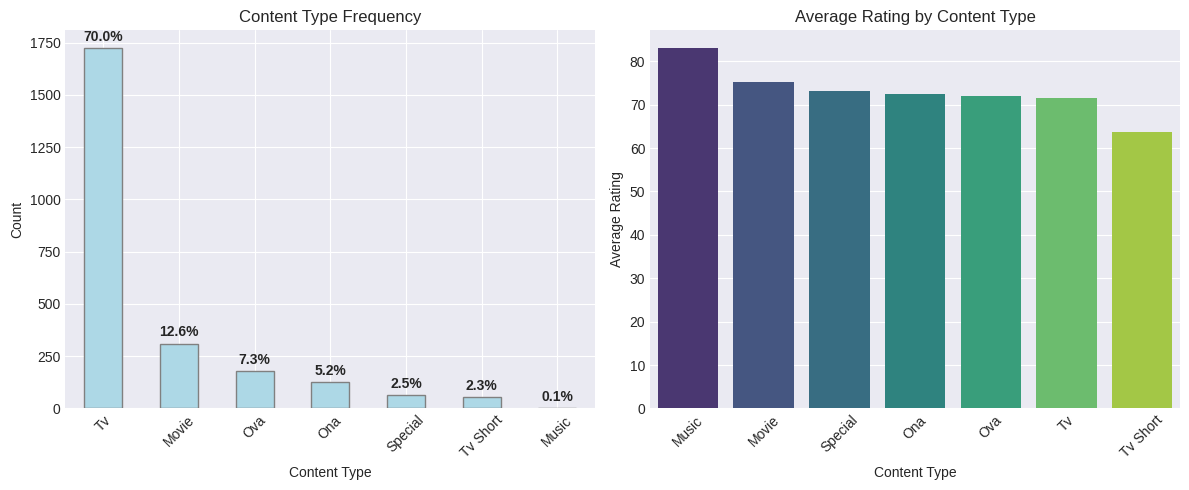

In [42]:
print("="*50)
print("2. BIVARIATE ANALYSIS")
print("="*50)

print("📺 CONTENT TYPE vs RATING RELATIONSHIP:")

# Analyze the RELATIONSHIP between content type and ratings
content_ratings = df_clean.groupby(['content_type'])['viewer_reviews'].mean().sort_values(ascending=False)
best_rated_type = content_ratings.index[0]
worst_rated_type = content_ratings.index[-1]

print(f"RATING PERFORMANCE BY CONTENT TYPE:")
print(f"   Best rated: {best_rated_type} (avg: {content_ratings.iloc[0]:.1f})")
print(f"   Worst rated: {worst_rated_type} (avg: {content_ratings.iloc[-1]:.1f})")
print(f"   Rating difference: {(content_ratings.iloc[0] - content_ratings.iloc[-1]):.1f} points")

print(f"\nRATING BREAKDOWN:")
for content_type, avg_rating in content_ratings.items():
    count = df_clean[df_clean['content_type'] == content_type].shape[0]
    print(f"   {content_type}: {avg_rating:.1f} avg ({count} animes)")

plt.figure(figsize=(12, 5))

# Content type frequency (for context)
plt.subplot(1, 2, 1)
df_content = df_clean['content_type'].value_counts()
ax = df_content.plot(kind='bar', color='lightblue', edgecolor='gray')
for i, v in enumerate(df_content.values):
    percentage = (v / len(df_clean) * 100).round(1)
    ax.text(i, v + 20, f'{percentage}%', ha='center', va='bottom', fontweight='bold')
plt.title('Content Type Frequency')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# THE RELATIONSHIP: Average rating by content type
plt.subplot(1, 2, 2)
sns.barplot(x=content_ratings.index, y=content_ratings.values, palette='viridis')
plt.title('Average Rating by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [38]:
# Top studios by production volume
df_studios = df_clean.groupby(['studio'])['studio'].count().sort_values(ascending=False).head(10)
print("TOP 10 STUDIOS BY PRODUCTION VOLUME:")
print(df_studios)

TOP 10 STUDIOS BY PRODUCTION VOLUME:
studio
J.C.STAFF          116
MADHOUSE           102
Aniplex             99
Production I.G      79
A-1 Pictures        74
Toei Animation      73
bones               73
Kyoto Animation     65
Sunrise             58
Studio Pierrot      49
Name: studio, dtype: int64
